In [44]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model, model_to_dot

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
data = np.load("/content/drive/Shareddrives/MLF/data.npz")
x_train_in = data['X_train']
x_test_in = data['X_test']

y_train_in = pd.read_csv("/content/drive/Shareddrives/MLF/y_train.csv")




In [48]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

In [68]:
print(x_train_in.shape)
print(x_test_in.shape)

(16182, 45, 51, 4)
(4796, 45, 51, 4)


<Figure size 640x480 with 0 Axes>

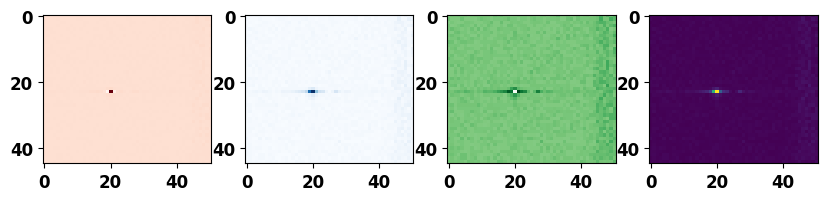

In [51]:
display_channels_separately(x_test_in[5])

In [52]:
clasess = 4

y_train_in = y_train_in.drop("id", axis = 1)

x_train_scaled = x_train_in.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train_in, num_classes=clasess)
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled,y_train_encoded, test_size=0.2)

In [53]:
x_train_scaled.shape

(16182, 45, 51, 4)

In [54]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(5,5),activation='relu6',kernel_regularizer=regularizers.l2(0.01),input_shape=(45, 51, 4)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu6',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 41, 47, 64)        6464      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 13, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 960)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

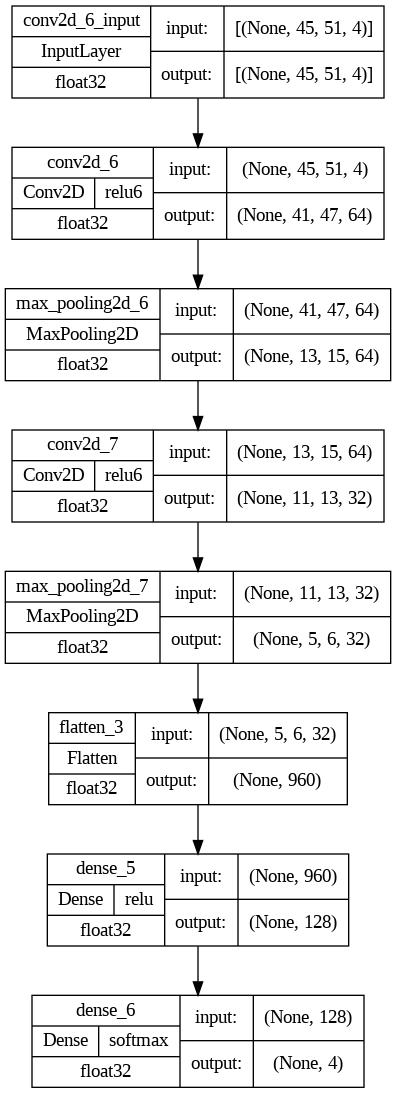

In [70]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [64]:
optimizer = Adam(learning_rate = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split = 0.2)

Epoch 1/25
324/324 [==============================] - 5s 11ms/step - loss: 0.1228 - accuracy: 0.9649 - val_loss: 0.1547 - val_accuracy: 0.9533
Epoch 2/25
324/324 [==============================] - 2s 6ms/step - loss: 0.1163 - accuracy: 0.9651 - val_loss: 0.1557 - val_accuracy: 0.9544
Epoch 3/25
324/324 [==============================] - 2s 7ms/step - loss: 0.1188 - accuracy: 0.9686 - val_loss: 0.1472 - val_accuracy: 0.9564
Epoch 4/25
324/324 [==============================] - 2s 7ms/step - loss: 0.1098 - accuracy: 0.9705 - val_loss: 0.1461 - val_accuracy: 0.9560
Epoch 5/25
324/324 [==============================] - 2s 6ms/step - loss: 0.1095 - accuracy: 0.9700 - val_loss: 0.1407 - val_accuracy: 0.9567
Epoch 6/25
324/324 [==============================] - 2s 6ms/step - loss: 0.1038 - accuracy: 0.9718 - val_loss: 0.1516 - val_accuracy: 0.9552
Epoch 7/25
324/324 [==============================] - 2s 6ms/step - loss: 0.1064 - accuracy: 0.9706 - val_loss: 0.1406 - val_accuracy: 0.9583
Epoch

In [66]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.17374272644519806
Test accuracy: 94.50108408927917 %


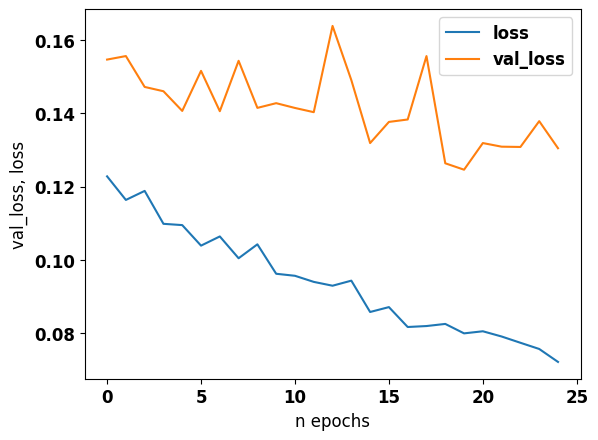

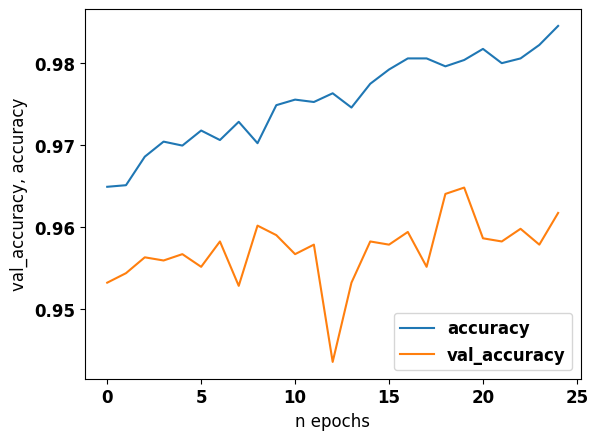

In [67]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()

In [61]:
x_test_pred_scaled = x_test_in.astype('float32') /255.0


pred_numbs = np.argmax(model.predict([x_test_pred_scaled]), axis=1)


df = pd.DataFrame({'id': range(len(pred_numbs)), 'target': pred_numbs})

df.to_csv('kaggle_v3.csv', index=False)



150/150 [==============================] - 0s 2ms/step


In [69]:
#!cp kaggle_v3.csv /content/drive/Shareddrives/MLF